# MSDS 422-DL Project

Anthony Gallante<br>
Mar 16, 2025

## Final Project

In [1]:
import os

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Removing the Maximum Columns option to create a
# side-scrollable dataframe in the notebook output.
pd.options.display.max_columns = None

# Setting the ggplot style for matplotlib plots.
plt.style.use('ggplot')

Reading in data files

In [2]:
def strColToDatetime(df):
    return [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S') for dt in df['datetime']]

summer_df = pd.read_csv('muskox_summer_data.csv').dropna()
winter_df = pd.read_csv('muskox_winter_data.csv').dropna()

summer_df['datetime'] = strColToDatetime(summer_df)
winter_df['datetime'] = strColToDatetime(winter_df)

In [3]:
display(summer_df.head(2))
display(winter_df.head(2))

burst_id       step     angle              x  \
1  4022_31_1_3_snowfree_2016  83.108942  2.662288  479810.695025   
2  4022_31_1_3_snowfree_2016  27.117565 -2.172764  479825.208600   

              y            datetime  tday  month  julian  light  year_2014  \
1  8.265607e+06 2016-06-19 01:00:00     1      6     171      1          0   
2  8.265689e+06 2016-06-19 02:00:00     2      6     171      1          0   

   year_2015  year_2016  year_2017  elevation_scaled  dist_sea_scaled  \
1          0          1          0          0.358883        -0.168525   
2          0          1          0          0.437094        -0.141171   

   hillshade_scaled  ruggedness_scaled  ocean  water  glacier  bareground  \
1         -1.640944           0.859694      0      0        0           1   
2         -1.984517           1.268340      0      0        0           1   

   sparseveg  denseveg  snowdepth_scaled  airtemp_scaled  windspeed_scaled  \
1          0         0         -1.367948        1.324766         -0.626076   
2          0         0         -1.367948        1.333743         -0.807630   

   winddir_interpol  total_precip_scaled  ndvi_scaled  viterbi  
1             291.5            -0.241742     -0.60376        2  
2             293.6            -0.241742     -0.60376        2

burst_id        step     angle              x             y  \
1  4022_03_1_1_snow_201314  131.096201 -2.946798  513103.695025  8.266415e+06   
2  4022_03_1_1_snow_201314    1.707630  0.985363  513054.208600  8.266537e+06   

             datetime  tday  month  julian  light  year_201314  year_201415  \
1 2013-10-08 14:00:00    14     10     281      1            1            0   
2 2013-10-08 15:00:00    15     10     281      1            1            0   

   year_201516  year_201617  elevation_scaled  dist_sea_scaled  \
1            0            0         -0.949146        -0.168957   
2            0            0         -0.932100        -0.140752   

   hillshade_scaled  ruggedness_scaled  ocean  water  glacier  bareground  \
1          0.020371          -0.825011      0      0        0           0   
2          0.411838          -1.017769      0      0        0           0   

   sparseveg  denseveg  snowdepth_scaled  airtemp_scaled  windspeed_scaled  \
1          0         1         -0.138155         0.61556         -0.202452   
2          0         1         -0.138155         0.61556         -0.202452   

   winddir_interpol  total_precip_scaled  viterbi  
1              14.6            -0.241742        2  
2              14.6            -0.241742        1

In [4]:
n_states = 3

state_decoder = {1: 'Resting', 2: 'Foraging', 3: 'Relocating'}
reverse_state_decoder = {'Resting': 1, 'Foraging': 2, 'Relocating': 3}

# Trying to find similar state colors to the Muskox paper
state_colors = {'Resting': mcolors.XKCD_COLORS['xkcd:squash'],
                'Foraging': mcolors.XKCD_COLORS['xkcd:dark sage'],
                'Relocating': mcolors.XKCD_COLORS['xkcd:light blue grey']
                }

for df in [summer_df, winter_df]:
    df['state'] = [state_decoder[v] for v in df['viterbi']]
    df['colors'] = [state_colors[c] for c in df['state']]

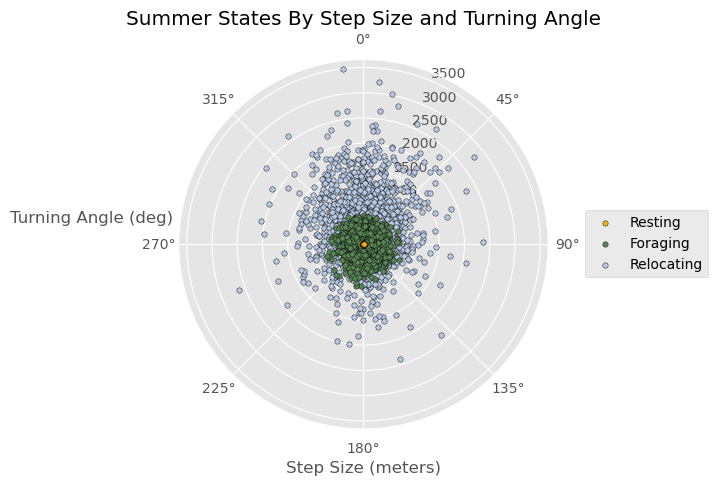

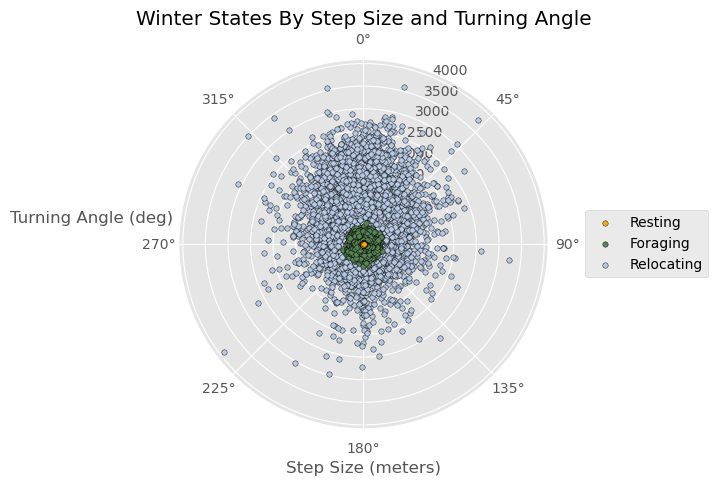

In [5]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):

    plt.figure()
    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]

        ax = plt.subplot(polar=True)
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)

        ax.scatter(x=state_df['angle'], y=state_df['step'], color=state_colors[state_decoder[state]], zorder=10-i, edgecolor='k', label=state_decoder[state], s=15, lw=0.3)
        
        plt.title(f'{season} States By Step Size and Turning Angle')
        plt.xlabel('Step Size (meters)')
        plt.ylabel('Turning Angle (deg)', rotation=0, ha='right', y=0.55)
        plt.legend(loc=[1.1, 0.41])

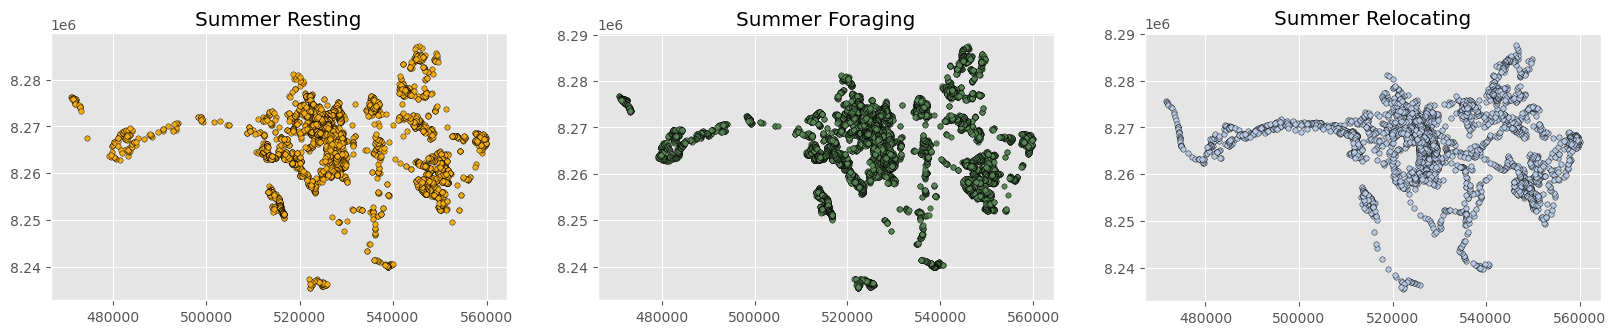

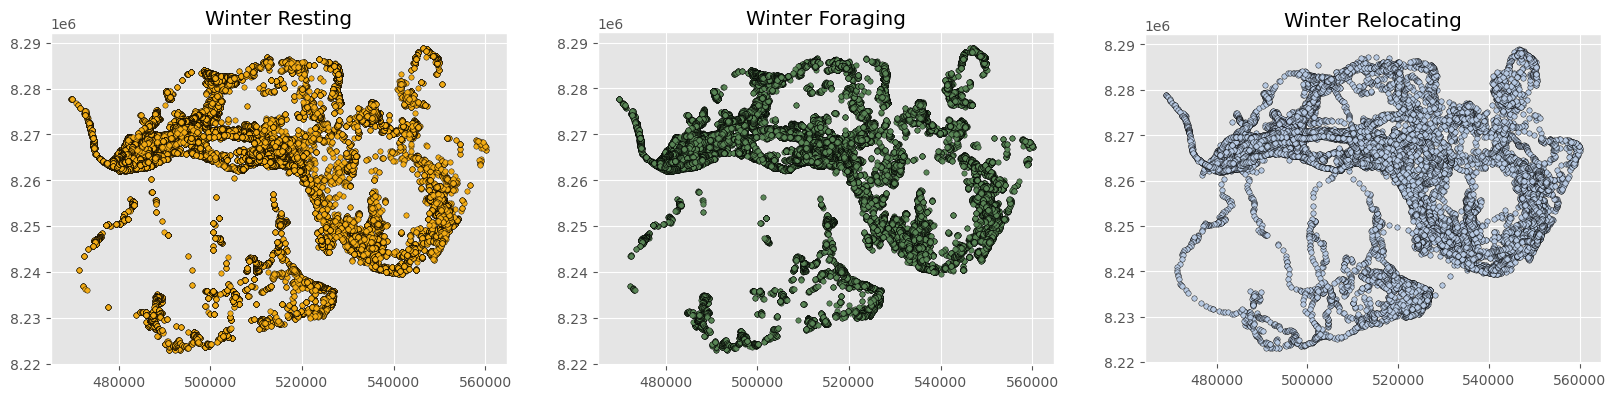

In [6]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]
    
        axes[i].scatter(state_df['x'], state_df['y'], color=state_colors[state_decoder[state]], edgecolor='k', lw=0.3, s=15)
        axes[i].set_ylim([4.7e5, 5.61e5])
        axes[i].set_ylim([8.2e6, 8.3e6])
        axes[i].axis('scaled')
        axes[i].set_title(f'{season} {state_decoder[i+1]}')

plt.show()

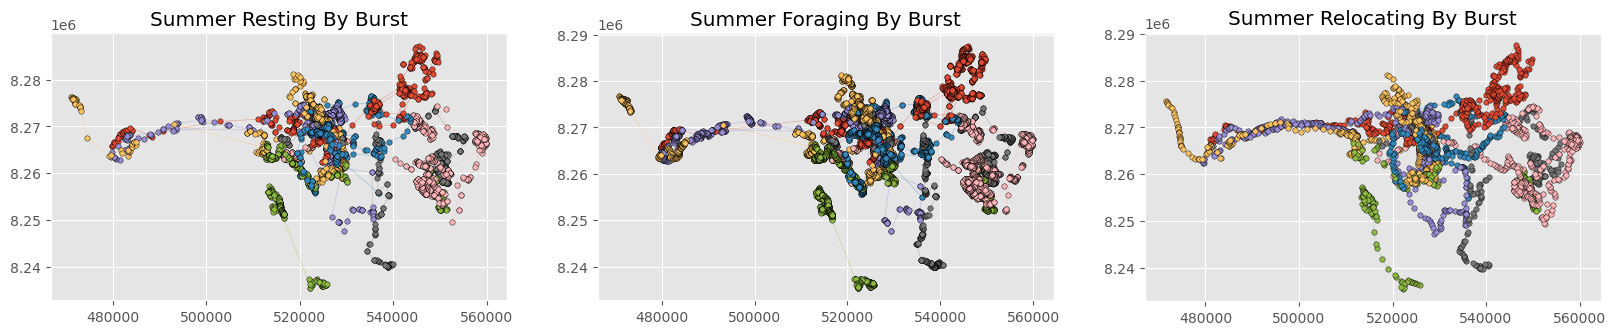

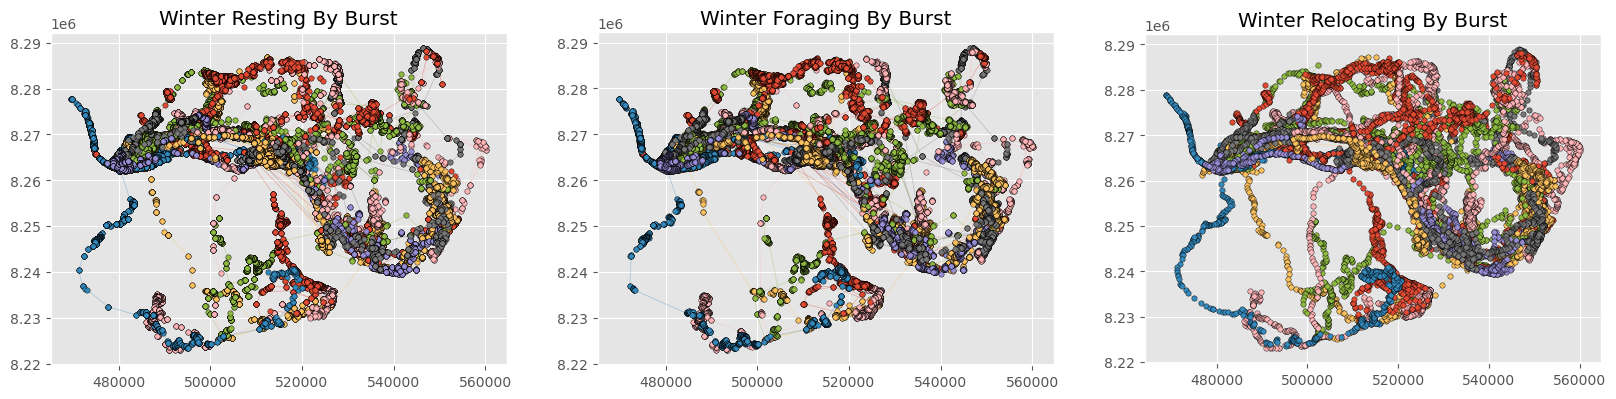

In [7]:
for season, season_df in zip(['Summer', 'Winter'], [summer_df, winter_df]):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

    for i, state in enumerate(range(1, n_states+1)):
        is_in_state = season_df['viterbi'] == state
        state_df = season_df[is_in_state]

        for burst_id in season_df['burst_id'].unique():
            is_burst_id = state_df['burst_id'] == burst_id
            state_burst_df = state_df[is_burst_id]

            axes[i].scatter(state_burst_df['x'], state_burst_df['y'], s=15, edgecolor='k', zorder=10, lw=0.3)
            axes[i].plot(state_burst_df['x'], state_burst_df['y'], alpha=0.4, lw=0.5)
            axes[i].set_title(f'{season} {state_decoder[i+1]} By Burst')
            axes[i].set_ylim([4.7e5, 5.61e5])
            axes[i].set_ylim([8.2e6, 8.3e6])
            axes[i].axis('scaled')

    plt.show()

In [8]:
winter_df.columns

Index(['burst_id', 'step', 'angle', 'x', 'y', 'datetime', 'tday', 'month',
       'julian', 'light', 'year_201314', 'year_201415', 'year_201516',
       'year_201617', 'elevation_scaled', 'dist_sea_scaled',
       'hillshade_scaled', 'ruggedness_scaled', 'ocean', 'water', 'glacier',
       'bareground', 'sparseveg', 'denseveg', 'snowdepth_scaled',
       'airtemp_scaled', 'windspeed_scaled', 'winddir_interpol',
       'total_precip_scaled', 'viterbi', 'state', 'colors'],
      dtype='object')

In [9]:
summer_covariate_names = ['tday', 'month',
       'julian', 'light', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled',
       'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground',
       'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled',
       'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled',
       'ndvi_scaled']

winter_covariate_names = ['tday', 'month',
       'julian', 'light', 'year_201314', 'year_201415', 'year_201516',
       'year_201617', 'elevation_scaled', 'dist_sea_scaled',
       'hillshade_scaled', 'ruggedness_scaled', 'ocean', 'water', 'glacier',
       'bareground', 'sparseveg', 'denseveg', 'snowdepth_scaled',
       'airtemp_scaled', 'windspeed_scaled', 'winddir_interpol',
       'total_precip_scaled']

We'll use a Random Forest Classifier below to get an idea of which covariates help predict the next state transition. 
Then, we can use SHAP to explain what covariates might be most important when we start developing our RNN.

This won't truly represent the HMM, but without the actual model used in the study, this might be a good way to at least find the most significant covariate predictors.

Since these covariates influence the probability transition matrix of the Hidden Markov Model, we will shift the viterbi column up by one record prior to fitting our random forest. This way, we are more likely to find each covariate's importance as a predictor of the <i>next</i> hidden state.

In [10]:
from sklearn.ensemble import RandomForestClassifier

summer_covariates = summer_df[summer_covariate_names]
winter_covariates = winter_df[winter_covariate_names]

summer_states = summer_df['viterbi'].shift(-1)
winter_states = winter_df['viterbi'].shift(-1)

summer_cov_prediction = RandomForestClassifier()
summer_cov_prediction.fit(summer_covariates[:-1], 
                          summer_states[:-1])

winter_cov_prediction = RandomForestClassifier()
winter_cov_prediction.fit(winter_covariates[:-1], 
                          winter_states[:-1])


RandomForestClassifier()

PermutationExplainer explainer: 51it [00:25,  1.40it/s]                        


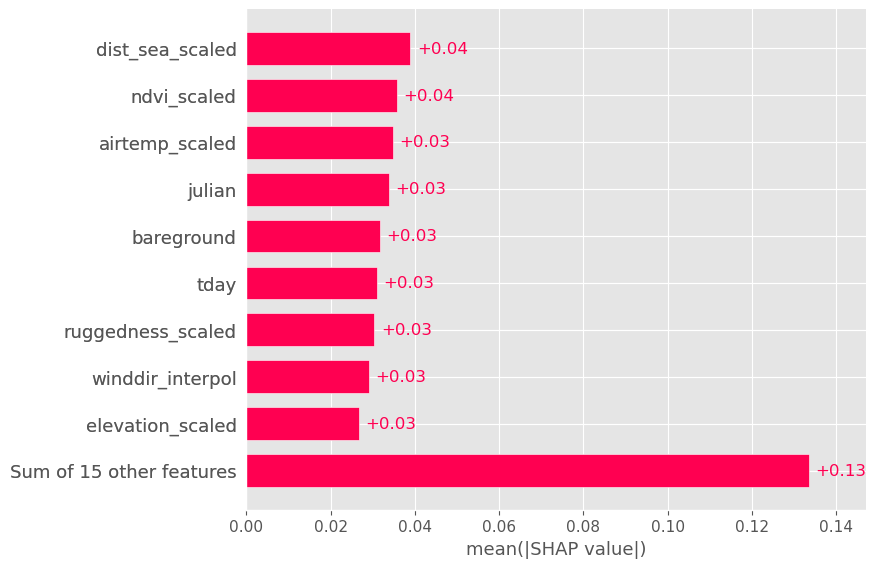

In [11]:
import shap

explainer = shap.Explainer(summer_cov_prediction.predict , summer_covariates.sample(100))
shap_values = explainer(summer_covariates.sample(50))
shap.plots.bar(shap_values)

While there are several ways to attempt to replicate the data from the HMM's Viterbi algorithm, I think a sensible way to do this is to define the behavior that we're looking for first. 

The most notable observation is that states are <i>almost completely defined by the step-size emission feature </i> and turning angle is an afterthought.

In [12]:
summer_resting = summer_df[summer_df['state'] == 'Resting']
summer_foraging = summer_df[summer_df['state'] == 'Foraging']
summer_relocating = summer_df[summer_df['state'] == 'Relocating']

winter_resting = winter_df[winter_df['state'] == 'Resting']
winter_foraging = winter_df[winter_df['state'] == 'Foraging']
winter_relocating = winter_df[winter_df['state'] == 'Relocating']

### Comparing Muskoxen "Resting" in Summer and Winter

One thing that becomes immediately obvious, especially when paired with the plots above, is that resting is characterized by little to no movement. Step-turn vectors can face any direction, but are still determined to be a member of the resting state if the step size is less than approximately 25m.
We see a significant difference in quantity of resting datapoints between the two datasets (23 percentage points), with more resting occurring in the winter months.

In [13]:
display(summer_resting.describe()[['step', 'angle']])
display(winter_resting.describe()[['step', 'angle']])

print(
    f"""
    ====== Resting ======
    Summer Percentage:
    {len(summer_resting) / len(summer_df)}
    Winter Percentage:
    {len(winter_resting) / len(winter_df)}
    """)

step        angle
count  5330.000000  5330.000000
mean      5.643574     0.053062
min       0.025785    -3.140879
25%       2.680153    -1.719438
50%       4.781565     0.061371
75%       7.888158     1.866298
max      24.669233     3.141481
std       3.775945     1.943458

step         angle
count  88068.000000  88068.000000
mean       5.190097      0.063356
min        0.006476     -3.141571
25%        2.349938     -1.947829
50%        4.087526      0.162834
75%        7.093057      2.054591
max       25.749895      3.141536
std        3.841094      2.063182


    ====== Resting ======
    Summer Percentage:
    0.1952738596812603
    Winter Percentage:
    0.4216301615798923
    


### Comparing Muskoxen "Foraging" in Summer and Winter

Just like the other states, turning angles in the summer and winter months are determined by step size. The two datasets share near-identical turning angle characteristics. 

One hypothesis is that Muskoxen exhibit a truly different behavior in their foraging strategies in the summer and winter months. Muskoxen can afford to expend more energy and resources traveling further distances in search of food. We see a significant difference in quantity of foraging datapoints between the two datasets (22 percentage points), with more foraging occuring in the summer months.

Another hypothesis is, that by allowing the HMM to choose the foraging state and by initializing the state with a wider Gaussian distribution, datapoints that would normally have been classified as "Relocating" in the winter model are instead classified as "Foraging" in the summer model. 

In [14]:
display(summer_foraging.describe()[['step', 'angle']])
display(winter_foraging.describe()[['step', 'angle']])

print(
    f"""
    ====== Resting ======
    Summer Percentage:
    {len(summer_foraging) / len(summer_df)}
    Winter Percentage:
    {len(winter_foraging) / len(winter_df)}
    """)

step         angle
count  18431.000000  18431.000000
mean     125.788774     -0.006149
min        0.412238     -3.141282
25%       46.771829     -1.289321
50%       96.169791     -0.022937
75%      174.190137      1.260809
max      839.549486      3.140503
std      104.903574      1.676549

step         angle
count  95445.000000  95445.000000
mean      68.610598     -0.000849
min        0.102888     -3.141556
25%       26.672634     -1.299648
50%       50.424560     -0.004369
75%       92.947396      1.295437
max      474.442470      3.141465
std       57.559070      1.708904


    ====== Resting ======
    Summer Percentage:
    0.6752518776332662
    Winter Percentage:
    0.45694793536804307
    


### Comparing Muskoxen "Relocating" in Summer and Winter

Relocating does not appear to be characterized by drastically different behavior between the two datasets. Relocating is generally characterized by large step sizes, regardless of turning angle. In both summer and winter months, muskoxen appear to spend approximately 12-13% of their time relocating.

In [15]:
display(summer_relocating.describe()[['step', 'angle']])
display(winter_relocating.describe()[['step', 'angle']])

print(
    f"""
    ====== Relocating ======
    Summer Percentage:
    {len(summer_relocating) / len(summer_df)}
    Winter Percentage:
    {len(winter_relocating) / len(winter_df)}
    """)

step        angle
count  3534.000000  3534.000000
mean    536.150034     0.030807
min       0.903252    -3.140719
25%     252.787102    -0.550522
50%     421.208073     0.013996
75%     667.331169     0.602713
max    3485.489346     3.140267
std     428.882809     1.076754

step         angle
count  25362.000000  25362.000000
mean     429.871028      0.003003
min        0.216013     -3.141467
25%      169.259148     -0.599865
50%      292.555360      0.002829
75%      511.748564      0.604266
max     3897.054507      3.141562
std      425.796037      1.192707


    ====== Relocating ======
    Summer Percentage:
    0.12947426268547352
    Winter Percentage:
    0.12142190305206463
    


In [16]:
print(summer_df['step'].describe(), '\n')
print(winter_df['step'].describe())


count    27295.000000
mean       155.458778
std        234.490160
min          0.025785
25%         21.638236
50%         83.707193
75%        192.012739
max       3485.489346
Name: step, dtype: float64 

count    208875.000000
mean         85.735531
std         201.947398
min           0.006476
25%           4.858396
50%          20.842835
75%          80.939682
max        3897.054507
Name: step, dtype: float64


## Labelling the Dataset Manually

Using our quartiles above as a guide, we will define resting, foraging, and relocating as the following:

| | Summer | Winter |
|---|---|---|
| Resting| Step Size < 25 | Step Size < 25 |
| Foraging | 25 < Step Size < 100 | 25 < Step Size < 60 |
| Relocating | Step Size > 100 | Step Size > 60 |

This step assumes the hypothesis of Baumer et al, in that muskoxen exhibit different behavior in the summer and winter months, while also removing any direct dependency on their HMM models. I argue here that the step sizes of 100m and 60m, while based on filtered dataframes created by the HMM models in this case, could just have easily been assigned through trial and error by the authors. 


In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
REST_LIMIT = 25
SUM_FORAGING_LIMIT = 100
WIN_FORAGING_LIMIT = 60

summer_labels, winter_labels = [], []

for step_size in summer_df['step']:
    if step_size < REST_LIMIT:
        summer_labels.append('Resting')
    elif step_size < SUM_FORAGING_LIMIT:
        summer_labels.append('Foraging')
    else:
        summer_labels.append('Relocating')

for step_size in winter_df['step']:
    if step_size < REST_LIMIT:
        winter_labels.append('Resting')
    elif step_size < WIN_FORAGING_LIMIT:
        winter_labels.append('Foraging')
    else:
        winter_labels.append('Relocating')

summer_df['labels'] = summer_labels
winter_df['labels'] = winter_labels

# Building a Predictor

In [19]:
summer_feature_columns = ['burst_id',
    'step', 'angle', 'x', 'y', 'tday', 'month', 'julian', 'light',
    'year_2014', 'year_2015', 'year_2016', 'year_2017',
    'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled', 
    'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground', 
    'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled', 
    'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled', 'ndvi_scaled'
]

winter_feature_columns = ['burst_id',
    'step', 'angle', 'x', 'y', 'tday', 'month', 'julian', 'light',
    'year_201314', 'year_201415', 'year_201516', 'year_201617', 
    'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled', 
    'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground', 
    'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled', 
    'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled',
]

summer_data, winter_data = summer_df[summer_feature_columns], winter_df[winter_feature_columns]

In [20]:
summer_unique_bursts = list(summer_df['burst_id'].unique())
winter_unique_bursts = list(winter_df['burst_id'].unique())

summer_df['id'] = [summer_unique_bursts.index(bid) for bid in summer_df['burst_id']]
winter_df['id'] = [winter_unique_bursts.index(bid) for bid in winter_df['burst_id']]

summer_unique_bursts = list(summer_df['burst_id'].unique())
winter_unique_bursts = list(winter_df['burst_id'].unique())

summer_df['id'] = [summer_unique_bursts.index(bid) for bid in summer_df['burst_id']]
winter_df['id'] = [winter_unique_bursts.index(bid) for bid in winter_df['burst_id']]

summer_df.drop('burst_id', axis=1, inplace=True)
winter_df.drop('burst_id', axis=1, inplace=True)

In [21]:
summer_feature_columns = [
    'step', 'angle', 'x', 'y', 'tday', 'month', 'julian', 'light',
    'year_2014', 'year_2015', 'year_2016', 'year_2017',
    'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled', 
    'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground', 
    'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled', 
    'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled', 'ndvi_scaled'
]

winter_feature_columns = [
    'step', 'angle', 'x', 'y', 'tday', 'month', 'julian', 'light',
    'year_201314', 'year_201415', 'year_201516', 'year_201617', 
    'elevation_scaled', 'dist_sea_scaled', 'hillshade_scaled', 
    'ruggedness_scaled', 'ocean', 'water', 'glacier', 'bareground', 
    'sparseveg', 'denseveg', 'snowdepth_scaled', 'airtemp_scaled', 
    'windspeed_scaled', 'winddir_interpol', 'total_precip_scaled',
]

In [22]:
only_observables = summer_df[['step', 'angle']].to_numpy()
summer_labels = np.array([reverse_state_decoder[lab] for lab in summer_labels])

In [23]:
ss = StandardScaler()
only_observables = ss.fit_transform(only_observables)
summer_labels = summer_labels - 1

In [24]:
pred_train, pred_test, pred_label, pred_test_label = train_test_split(only_observables, summer_labels)

n_observable_features = only_observables.shape[1]

In [25]:
def build_ANN(params):

    # Model Structure
    dense_1 = params.Int('Dense 1', min_value=2, max_value=130, step=16)
    dr1 = params.Float('Dropout Rate 1', min_value=0.1, max_value=0.5, step=0.1)
    dense_2 = params.Int('Dense 2', min_value=16, max_value=512, step=16)
    dense_3 = params.Int('Dense 3', min_value=16, max_value=512, step=16)
    dr2 = params.Float('Dropout Rate 2', min_value=0.1, max_value=0.5, step=0.1)

    ann = tf.keras.Sequential([
        tf.keras.layers.Dense(dense_1, activation='relu', input_shape=(n_observable_features,)),
        tf.keras.layers.Dropout(dr1),
        tf.keras.layers.Dense(dense_2, activation='relu'),
        tf.keras.layers.Dense(dense_3, activation='relu'),
        tf.keras.layers.Dropout(dr2),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return ann


In [26]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    build_ANN, objective='accuracy',
    max_trials=100, executions_per_trial=1,
    directory=f'{os.getcwd()}', project_name='Final Project - ANN Hyperparameter Tuning'
)

tuner.search(pred_train, pred_label, epochs=10, batch_size=32, validation_data=(pred_test, pred_test_label))


Reloading Tuner from c:\Users\amgal\Documents\Data Science\MSDS 422-DL\MSDS422 Project\Final Project - ANN Hyperparameter Tuning\tuner0.json


853/853 [==============================] - 1s 605us/step


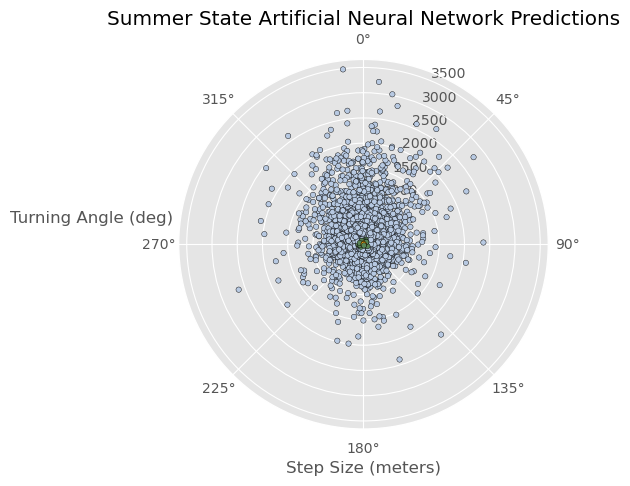

In [27]:
best_model = tuner.get_best_models(num_models=1)[0]

reconstructed_step_size = best_model.predict(only_observables)
reconstructed_step_size = [np.argmax(step) for step in reconstructed_step_size]

ax = plt.subplot(polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
colors = [list(state_colors.values())[c] for c in reconstructed_step_size]

ax.scatter(summer_df['angle'], summer_df['step'], c=colors, edgecolor='k', lw=0.3, s=15)

plt.title(f'Summer State Artificial Neural Network Predictions')
plt.xlabel('Step Size (meters)')
plt.ylabel('Turning Angle (deg)', rotation=0, ha='right', y=0.55)
plt.show()

# Building Recurrent Neural Networks

In [28]:
ss = StandardScaler()

grouped = summer_df.groupby('id')

# Determine appropriate sequence length
burst_lengths = grouped.size()
sequence_length = int(np.percentile(burst_lengths, 95))
print(f"Using sequence length: {sequence_length}")

# Create sequences for each burst
num_features = len(summer_feature_columns)

# Prepare array for sequences
sequences = np.zeros((len(grouped), sequence_length, num_features))

for i, (burst_id, group) in enumerate(grouped):
    burst_data = group[summer_feature_columns].values

    if len(burst_data) > sequence_length:
        sequences[i] = ss.fit_transform(burst_data[:sequence_length])  # Truncate
    else:
        sequences[i, :len(burst_data)] = ss.fit_transform(burst_data) # Pad with zeros

Using sequence length: 1867


# Hyperparameter Tuning

In [29]:
n_future = 5
n_bursts, sequence_length, n_features = sequences.shape

X = sequences[:, :-n_future, :]
y = sequences[:, -n_future:, :]

def build_RNN(params):

    # Model Structure
    lstm_units = params.Int('LSTM', min_value=16, max_value=512, step=16)
    dr = params.Float('Dropout Rate', min_value=0.1, max_value=0.5, step=0.1)
    dense_units = params.Int('Dense 1', min_value=2, max_value=130, step=16)

    rnn = tf.keras.Sequential([
        tf.keras.layers.LSTM(lstm_units, return_sequences=False, input_shape=(sequence_length - n_future, n_features)),
        tf.keras.layers.Dropout(dr),
        tf.keras.layers.Dense(dense_units, activation='relu'),
        tf.keras.layers.Dropout(dr),
        tf.keras.layers.Dense(n_future * n_features),
        tf.keras.layers.Reshape((n_future, n_features))
    ])

    rnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    return rnn


In [30]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    build_RNN, objective='loss',
    max_trials=20, executions_per_trial=1,
    directory=f'{os.getcwd()}', project_name='Final Project - Hyperparameters'
)

tuner.search(X, y, epochs=5, batch_size=32)

Reloading Tuner from c:\Users\amgal\Documents\Data Science\MSDS 422-DL\MSDS422 Project\Final Project - Hyperparameters\tuner0.json


In [31]:
Model1, Model2, Model3 = tuner.get_best_models(num_models=3)

for model in [Model1, Model2, Model3]:
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 288)               365184    
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 82)                23698     
                                                                 
 dropout_1 (Dropout)         (None, 82)                0         
                                                                 
 dense_1 (Dense)             (None, 140)               11620     
                                                                 
 reshape (Reshape)           (None, 5, 28)             0         
                                                                 
Total params: 400,502
Trainable params: 400,502
Non-trai

In [46]:
tuner.get_best_hyperparameters()[0].values

{'LSTM': 288, 'Dropout Rate': 0.2, 'Dense 1': 82}

In [37]:
def predict_future(sequence_data, model):
    input_sequence = sequence_data[:-n_future]
    
    if len(input_sequence.shape) == 2:
        input_sequence = np.expand_dims(input_sequence, axis=0) 
    
    return model.predict(input_sequence)

In [38]:
prediction = predict_future(sequences[0], Model1)
prediction = [ss.inverse_transform(p) for p in prediction]

track = ss.inverse_transform(sequences[0])[:, 2:4]
pred = prediction[0][:, 2:4]

1/1 [==============================] - 0s 129ms/step


In [48]:
prediction2 = predict_future(sequences[0], Model2)
prediction2 = [ss.inverse_transform(p) for p in prediction2]

track2 = ss.inverse_transform(sequences[0])[:, 2:4]
pred2 = prediction2[0][:, 2:4]

prediction3 = predict_future(sequences[0], Model3)
prediction3 = [ss.inverse_transform(p) for p in prediction3]

track3 = ss.inverse_transform(sequences[0])[:, 2:4]
pred3 = prediction3[0][:, 2:4]

1/1 [==============================] - 0s 415ms/step


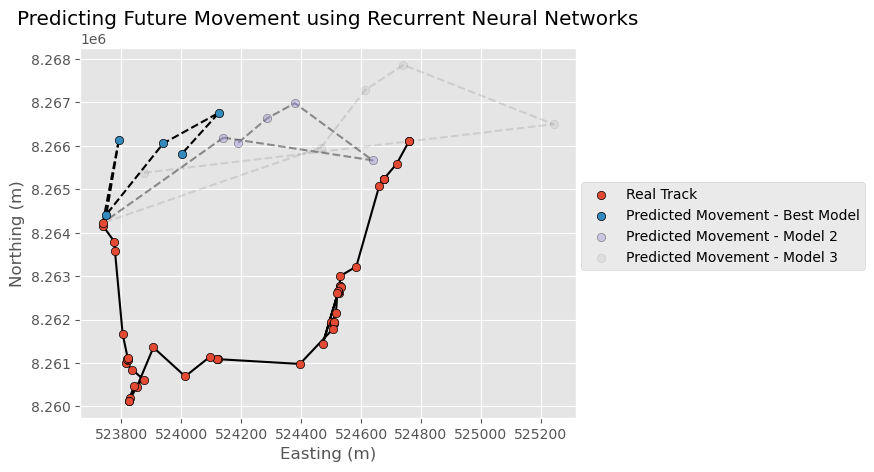

In [63]:
plt.scatter(x=track[:, 0][-50:], y=track[:, 1][-50:], zorder=10, edgecolor='k', label='Real Track')

plt.scatter(x=pred[:, 0], y=pred[:, 1], zorder=10, edgecolor='k', label='Predicted Movement - Best Model')
plt.scatter(x=pred2[:, 0], y=pred2[:, 1], zorder=10, edgecolor='k', label='Predicted Movement - Model 2', alpha=0.4)
plt.scatter(x=pred3[:, 0], y=pred3[:, 1], zorder=10, edgecolor='k', label='Predicted Movement - Model 3', alpha=0.1)


plt.plot(track[:, 0][-50:], track[:, 1][-50:], zorder=1, color='k')
plt.plot(pred[:, 0], pred[:, 1], zorder=1, color='k', linestyle='--')
plt.plot([pred[0][0], track[-1][0]], [pred[0][1], track[-1][1]], linestyle='--', color='k')

plt.plot(pred2[:, 0], pred2[:, 1], zorder=1, color='k', linestyle='--', alpha=0.4)
plt.plot([pred2[0][0], track2[-1][0]], [pred2[0][1], track2[-1][1]], linestyle='--', alpha=0.4, color='k')

plt.plot(pred3[:, 0], pred3[:, 1], zorder=1, color='k', linestyle='--', alpha=0.1)
plt.plot([pred3[0][0], track3[-1][0]], [pred3[0][1], track3[-1][1]], linestyle='--', alpha=0.1, color='k')

plt.legend(loc=(1.01, 0.4))
plt.title('Predicting Future Movement using Recurrent Neural Networks')
plt.ylabel('Northing (m)')
plt.xlabel('Easting (m)')
plt.show()